In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
from datetime import date, datetime
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *


- hdfs에 data 이동
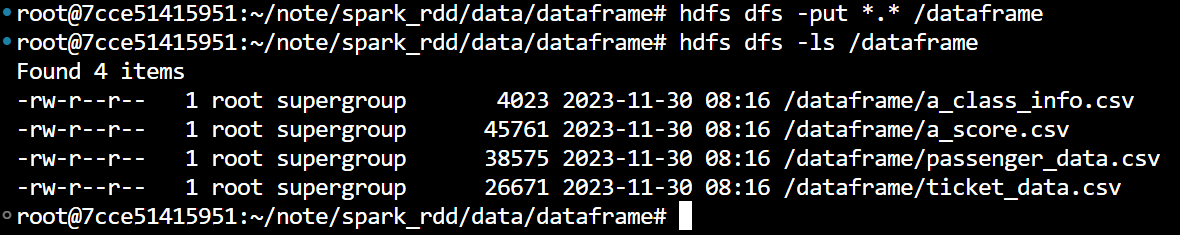

## select()

- select() 메소드는 SQL의 Select 절과 유사하게 한개 이상의 컬럼들의 값을 DataFrame형태로 반환
- 한개의 컬럼명, 또는 여러개의 컬럼명을 인자로 입력 가능
- 개별 컬럼명을 문자열 형태로 또는 DataFrame의 컬럼 속성으로 지정 가능
- DataFrame의 컬럼 속성으로 지정시에는 DataFrame.컬럼명, DataFrame[컬럼명], col(컬럼명) 으로 지정 가능

- DataFrame.select(*cols)[source]
- Parameters
- cols : str, Column, or list
- column names (string) or expressions (Column). 
    - If one of the column names is ‘*’, that column is expanded to include all columns in the current DataFrame.

+--------+------+-------------+--------+-----------+-------------+
|class_cd|school|class_std_cnt|     loc|school_type|teaching_type|
+--------+------+-------------+--------+-----------+-------------+
|     6OL| ANKYI|           20|   Urban| Non-public|     Standard|
|     ZNS| ANKYI|           21|   Urban| Non-public|     Standard|
|     2B1| CCAAW|           18|Suburban| Non-public| Experimental|
|     EPS| CCAAW|           20|Suburban| Non-public| Experimental|
|     IQN| CCAAW|           15|Suburban| Non-public| Experimental|
|     PGK| CCAAW|           21|Suburban| Non-public|     Standard|
|     UHU| CCAAW|           16|Suburban| Non-public| Experimental|
|     UWK| CCAAW|           19|Suburban| Non-public|     Standard|
|     A33| CIMBB|           19|   Urban| Non-public|     Standard|
|     EID| CIMBB|           21|   Urban| Non-public|     Standard|
|     HUJ| CIMBB|           17|   Urban| Non-public| Experimental|
|     PC6| CIMBB|           17|   Urban| Non-public|     Stand

In [8]:
# str

# * 를 사용하면 모든 컬럼 조회 가능


# list도 써보자



+------+
|school|
+------+
| ANKYI|
| ANKYI|
| CCAAW|
+------+
only showing top 3 rows



+------+--------+
|school|class_cd|
+------+--------+
| ANKYI|     6OL|
| ANKYI|     ZNS|
| CCAAW|     2B1|
+------+--------+
only showing top 3 rows

+--------+------+-------------+--------+-----------+-------------+
|class_cd|school|class_std_cnt|     loc|school_type|teaching_type|
+--------+------+-------------+--------+-----------+-------------+
|     6OL| ANKYI|           20|   Urban| Non-public|     Standard|
|     ZNS| ANKYI|           21|   Urban| Non-public|     Standard|
|     2B1| CCAAW|           18|Suburban| Non-public| Experimental|
+--------+------+-------------+--------+-----------+-------------+
only showing top 3 rows

+------+--------+--------+
|school|     loc|class_cd|
+------+--------+--------+
| ANKYI|   Urban|     6OL|
| ANKYI|   Urban|     ZNS|
| CCAAW|Suburban|     2B1|
+------+--------+--------+
only showing top 3 rows



#### Column() 
- Column : 내부에 DataFrame 연산을 위한 expression을 가지고 있음
- DataFrame의 컬럼을 의미하는 객체


In [10]:
# Column : 내부에 DataFrame 연산을 위한 expression을 가지고 있다.

# 컬럼이름을 기반으로 DataFrame에서 컬럼값을 반환



# 데이터프레임에서 원하는 컬럼을 추출 가능
# 출력결과 : Column<'school'> => 'school' 이 컬럼의 expression

# 데이터 프레임의 모든 컬럼 반환




# 정규표현식으로 반환 - 해당 Column 객체를 select에 적용


Column<'school'>

Column<'school'>

['class_cd', 'school', 'class_std_cnt', 'loc', 'school_type', 'teaching_type']

Column<'unresolvedregex()'>

- DataFrame의 select 메서드의 인자로 column을 넘겨 DataFrame을 반환 받을 수 있다.
- school 컬럼의 값들을 저장하고 있는 DataFrame을 반환
- 스파크는 Lazy evaluate! 연산이 실제로 수행되지는 않는다.
- 느긋한 계산법(Lazy evaluation)은 계산의 결과값이 필요할 때까지 계산을 늦추는 기법이다. 
- 쓸데없는 계산을 줄이기위해 나온 연산이지만 스파크는 수행하지 않음으로 연산에 들이는 자원 및 시간을 제한 할 수 있음

In [11]:
# column() 대신 col() 사용 가능



# action 메서드를 호출하면 연산을 수행
# RDD Action 액션은 메소드 중에서 결과값이 정수나 리스트, 맵 등 RDD가 아닌 다른 타입인 것을 통칭해서 부르는 용어, show() collect() 등




# column list도 가능
# df.columns는 리스트 반환


+------+
|school|
+------+
| ANKYI|
| ANKYI|
| CCAAW|
+------+
only showing top 3 rows

+------+-----------+
|school|school_type|
+------+-----------+
| ANKYI| Non-public|
| ANKYI| Non-public|
| CCAAW| Non-public|
+------+-----------+
only showing top 3 rows

+------+--------+
|school|class_cd|
+------+--------+
| ANKYI|     6OL|
| ANKYI|     ZNS|
| CCAAW|     2B1|
+------+--------+
only showing top 3 rows

+--------+------+-------------+--------+-----------+-------------+
|class_cd|school|class_std_cnt|     loc|school_type|teaching_type|
+--------+------+-------------+--------+-----------+-------------+
|     6OL| ANKYI|           20|   Urban| Non-public|     Standard|
|     ZNS| ANKYI|           21|   Urban| Non-public|     Standard|
|     2B1| CCAAW|           18|Suburban| Non-public| Experimental|
+--------+------+-------------+--------+-----------+-------------+
only showing top 3 rows



#### Column 연산

- 산술연산 :  +  -  *  /  %
- 비교연산 : <  >  <=  >=  ==  !=
- 논리연산 : &  |




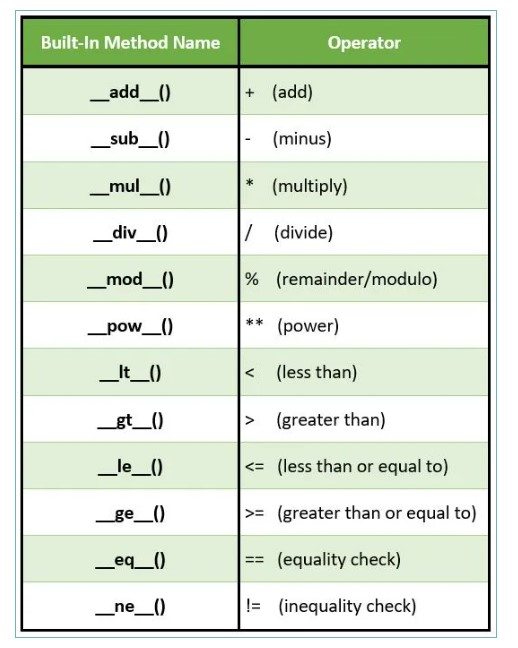

- spark columns 연산자
    - 파이썬의 연산자 오버로딩 을 사용하여 columns 들 간의 연산을 정의 함
        - 즉, 파이썬 연산자의 기능을 대부분 활용
    - column 연산에 따라 다른 expression을 가진 **Column이 생성**

In [12]:
school = class_df.school
classR = class_df.class_cd
std_cnt = class_df.class_std_cnt

# column 연산에 따라 다른 expression을 가진 Column이 생성된다.
# 나중에 DataFrame 연산 실행을 위한 논리적실행계획이 된다.
std_cnt + 10
std_cnt - 10
std_cnt * 10
std_cnt / 10
std_cnt % 2
std_cnt ** 2
std_cnt == 10
std_cnt != 10
(std_cnt > 10) & (std_cnt % 2 == 0)
(std_cnt < 10) | (std_cnt % 2 == 1)

Column<'(class_std_cnt + 10)'>

Column<'(class_std_cnt - 10)'>

Column<'(class_std_cnt * 10)'>

Column<'(class_std_cnt / 10)'>

Column<'(class_std_cnt % 2)'>

Column<'POWER(class_std_cnt, 2)'>

Column<'(class_std_cnt = 10)'>

Column<'(NOT (class_std_cnt = 10))'>

Column<'((class_std_cnt > 10) AND ((class_std_cnt % 2) = 0))'>

Column<'((class_std_cnt < 10) OR ((class_std_cnt % 2) = 1))'>

**연산 결과는 Column**

- DataFrame의 select에 Column 연산자 사용하여 연산
    - 반환결과가 Column이므로 컬럼이 추가됨

In [13]:
# DataFrame의 select 메서드에서 사용할 경우 해당 컬럼이 추가된 새로운 DataFrame이 생성된다.


+------+--------+----------------------------------------------------+
|school|class_cd|((class_std_cnt > 10) AND ((class_std_cnt % 2) = 0))|
+------+--------+----------------------------------------------------+
| ANKYI|     6OL|                                                true|
| ANKYI|     ZNS|                                               false|
| CCAAW|     2B1|                                                true|
+------+--------+----------------------------------------------------+
only showing top 3 rows

+------+--------+-----+
|school|class_cd| 별칭|
+------+--------+-----+
| ANKYI|     6OL| true|
| ANKYI|     ZNS|false|
| CCAAW|     2B1| true|
+------+--------+-----+
only showing top 3 rows



#### Column 메서드

- startsWith() 
    - Returns Boolean value true when DataFrame column value starts with a string specified as an argument to this method, when not match returns false.
- endsWith() 
    - Returns Boolean True when DataFrame column value ends with a string specified as an argument to this method, when not match returns false. .

In [15]:
# 위쪽 코드에서 df의 school 컬럼을 저장해놓은 변수
school

Column<'school'>

In [16]:
# 컬럼 별명 부여 가능 : alias()
# Column<'school AS `학교`'> 
# school AS '학교'  : column의 expression



# school 컬럼의 값들 중 'YI'로 끝나는 값은 True


Column<'school AS `학교`'>

Column<'endswith(school, YI)'>

In [17]:

# school.endswith('YI') YI로 끝나는지 여부 반환
# classR.like('%L%') data에 L이 포함되어 있는지 여부 반환


+-----+---+
| 학교| 반|
+-----+---+
|ANKYI|6OL|
|ANKYI|ZNS|
|CCAAW|2B1|
+-----+---+
only showing top 3 rows

+------+--------------------+--------+-----------------+
|school|endswith(school, YI)|class_cd|class_cd LIKE %L%|
+------+--------------------+--------+-----------------+
| ANKYI|                true|     6OL|             true|
| ANKYI|                true|     ZNS|            false|
| CCAAW|               false|     2B1|            false|
+------+--------------------+--------+-----------------+
only showing top 3 rows



#### **sort expression 기반의 column은 정렬과 관련된 transformation 메서드에서만 사용 가능**        
- scala api문서의 Dataset.sort() 메서드 문서를 보면 매개변수에 sort exprs 라고 표시가 되어 있다.
- std_cnt.asc() # std_cnt 컬럼 값 기준 오름차순 정렬
    - sort 함수의 매개변수로 사용할 수 있음(sort exprs임)

In [18]:
std_cnt   

Column<'class_std_cnt'>

- Column.asc() 함수는 sort expr로만 사용 가능
    - 즉, sort 함수 내 표현식으로만 사용할 수 있다 

In [20]:
# 에러 발생, 로그 확인

# Cannot generate code for expression: input[2, string, true] ASC NULLS FIRST

**spark.DataFrame.show() 함수는 모든 행을 출력하는 상수값이 없음**
- 모든행을 출력하고자 할 때는 df의 행을 카운트 해서 show()함수에 전달해야 함
- 매번 행을 카운트하려면 시점마다 연산해야 하므로
    - 자주 사용한다면 메모리에 상주시키는 df.persist() 나 df.cache를 사용하는것이 좋음

DataFrame[class_cd: string, school: string, class_std_cnt: string, loc: string, school_type: string, teaching_type: string]

+--------+------+-------------+--------+-----------+-------------+
|class_cd|school|class_std_cnt|     loc|school_type|teaching_type|
+--------+------+-------------+--------+-----------+-------------+
|     6OL| ANKYI|           20|   Urban| Non-public|     Standard|
|     ZNS| ANKYI|           21|   Urban| Non-public|     Standard|
|     2B1| CCAAW|           18|Suburban| Non-public| Experimental|
|     EPS| CCAAW|           20|Suburban| Non-public| Experimental|
|     IQN| CCAAW|           15|Suburban| Non-public| Experimental|
|     PGK| CCAAW|           21|Suburban| Non-public|     Standard|
|     UHU| CCAAW|           16|Suburban| Non-public| Experimental|
|     UWK| CCAAW|           19|Suburban| Non-public|     Standard|
|     A33| CIMBB|           19|   Urban| Non-public|     Standard|
|     EID| CIMBB|           21|   Urban| Non-public|     Standard|
|     HUJ| CIMBB|           17|   Urban| Non-public| Experimental|
|     PC6| CIMBB|           17|   Urban| Non-public|     Stand

In [22]:
school = class_df.school
classR = class_df.class_cd
std_cnt = class_df.class_std_cnt

+------+---+-------------+
|school| 반|class_std_cnt|
+------+---+-------------+
|  null|5SD|         null|
|  null|4SZ|         null|
|  null|6PP|         null|
|  null|MDE|           10|
| FBUMG|JGD|           14|
| FBUMG|197|           14|
| VHDHF|KR1|           15|
| CCAAW|IQN|           15|
| UUUQX|SSP|           15|
| UUUQX|H7S|           16|
+------+---+-------------+
only showing top 10 rows



+------+---+-------------+
|school| 반|class_std_cnt|
+------+---+-------------+
| GOOBU|18K|           31|
| VVTVA|A93|           30|
| ZOWMK|ZBH|           30|
| VVTVA|YTB|           30|
| ZOWMK|Q0E|           30|
| ZOWMK|QA2|           30|
| VVTVA|7BL|           29|
| CUQAM|1Q1|           28|
| CUQAM|OMI|           28|
| DNQDD|ROP|           28|
+------+---+-------------+
only showing top 10 rows



## select 연습

DataFrame은 class_df 를 사용합니다

1. 모든 row의  class_cd, school, loc, school_type, teaching_type을 출력하시오.  
   school_type의 컬럼명은 '공립/사립여부' 로 표시합니다.
   
   
2. class_cd, school, scale 을 출력하시오.   
   scale 컬럼은 반의 인원수가 15명 미만이면 small, 15명 이상 25명 미만이면 middle, 25명 이상이면 big 값을 가집니다.
   
   
3. class_cd, school, class_std_cnt를 출력하시오  
   class_std_cnt 컬럼의 값들은 string타입으로 형변환합니다.

In [25]:
from pyspark.sql import functions as F
cdf = class_df

# 모든 row의 class_cd, school, loc, school_type, teaching_type을 출력하시오.
# school_type의 컬럼명은 '공립/사립여부' 로 표시합니다.
# hint : alias()


+--------+------+--------+-------------+-------------+
|class_cd|school|     loc|공립/사립여부|teaching_type|
+--------+------+--------+-------------+-------------+
|     6OL| ANKYI|   Urban|   Non-public|     Standard|
|     ZNS| ANKYI|   Urban|   Non-public|     Standard|
|     2B1| CCAAW|Suburban|   Non-public| Experimental|
+--------+------+--------+-------------+-------------+
only showing top 3 rows



In [26]:
# class_cd, school, scale 을 출력하시오.
# scale 컬럼은 반의 인원수가 15명 미만이면 small, 15명 이상 25명 미만이면 middle, 25명 이상이면 big 값을 가집니다.
# hint : when()


+--------+------+------+
|class_cd|school| scale|
+--------+------+------+
|     6OL| ANKYI|middle|
|     ZNS| ANKYI|middle|
|     2B1| CCAAW|middle|
+--------+------+------+
only showing top 3 rows



In [27]:
# class_cd, school, class_std_cnt를 출력하시오
# class_std_cnt 컬럼의 값들은 string타입으로 형변환합니다.
# hint : cast()


+--------+------+-------------+
|class_cd|school|class_std_cnt|
+--------+------+-------------+
|     6OL| ANKYI|           20|
|     ZNS| ANKYI|           21|
|     2B1| CCAAW|           18|
+--------+------+-------------+
only showing top 3 rows

root
 |-- class_cd: string (nullable = true)
 |-- school: string (nullable = true)
 |-- class_std_cnt: string (nullable = true)



### sql문을 spark dataframe에 사용
- 바로 사용은 불가하고 sqark view를 만들어서 사용
- createOrReplaceTempView
    - 지정된 이름을 사용하여 로컬 임시 뷰를 만들거나 바꾼다
    - spark view는 sql query를 사용할 수 있는 객체

In [30]:
# sql을 사용해 같은 결과를 받아보기
# dataFrame을 View로 생성 후 사용


In [31]:
# 모든 row의 class_cd, school, loc, school_type, teaching_type을 출력하시오.
# school_type의 컬럼명은 '공립/사립여부' 로 표시합니다.


+--------+------+--------+-------------+-------------+
|class_cd|school|     loc|공립/사립여부|teaching_type|
+--------+------+--------+-------------+-------------+
|     6OL| ANKYI|   Urban|   Non-public|     Standard|
|     ZNS| ANKYI|   Urban|   Non-public|     Standard|
|     2B1| CCAAW|Suburban|   Non-public| Experimental|
+--------+------+--------+-------------+-------------+
only showing top 3 rows



In [32]:
# class_cd, school, scale 을 출력하시오.
# scale 컬럼은 반의 인원수가 15명 미만이면 small, 15명 이상 25명 미만이면 middle, 25명 이상이면 big 값을 가집니다.


+--------+------+------+
|class_cd|school| scale|
+--------+------+------+
|     6OL| ANKYI|middle|
|     ZNS| ANKYI|middle|
|     2B1| CCAAW|middle|
+--------+------+------+
only showing top 3 rows



In [33]:
# class_cd, school, class_std_cnt를 출력하시오
# class_std_cnt 컬럼의 값들은 string타입으로 형변환합니다.
# spark built-in-fnc 의 cast()


+--------+------+-------------+
|class_cd|school|class_std_cnt|
+--------+------+-------------+
|     6OL| ANKYI|           20|
|     ZNS| ANKYI|           21|
|     2B1| CCAAW|           18|
+--------+------+-------------+
only showing top 3 rows

root
 |-- class_cd: string (nullable = true)
 |-- school: string (nullable = true)
 |-- class_std_cnt: string (nullable = true)



## where(), filter()

- filter()는 SQL의 where와 유사하게 DataFrame내의 특정 조건을 만족하는 레코드를 DataFrame으로 반환
- filter()내의 조건 컬럼은 컬럼 속성으로 지정 가능. 조건문 자체는 SQL 과 유사한 문자열로 지정 할 수 있음
    - 조건 컬럼은 문자열 지정이 안됨
- 조건 컬럼은 문자열 지정이 안됨
    - SQL where와 직관적인 동일성을 간주하기 위해 생성
- 복합 조건 and는 & 를, or를 | 를 사용. 개별 조건은 ()로 감싸야 함            야 함

1. 공립이면서 교육방식이 전문인 데이터를 출력하시오

2. 사립이면서 교육방식이 표준인 데이터를 출력하시오

3. 학교 이름이 V로 시작하는 데이터를 출력하시오

4. 학교 이름이 V로 시작하지않는 데이터를 출력하시오 

5. 학교 이름이 M로 끝나는 데이터를 출력하시오

6. 학교 이름에 NKY가 포함된 데이터를 출력하시오

7. 반의 학생 수가 15명 이상 24명 이하인 데이터를 출력하시오

8. 학교 이름이 입력되지 않은 데이터들을 출력하시오


In [34]:
class_df.printSchema()

print('공립이면서 교육방식이 전문인 데이터를 출력하시오.')



print('사립이면서 교육방식이 표준 데이터를 출력하시오.')



print('학교 이름이 V로 시작하는 데이터를 출력하시오.')


print('학교 이름이 V로 시작하지 않는 데이터를 출력하시오.')

print('학교 이름이 M로 끝하는 데이터를 출력하시오.')


print('학교 이름에 NKY가 들어가는 데이터를 출력하시오.')

print('반의 학생 수가 15명 이상 24명 이하인 데이터를 출력하시오.')
# between(start 이상, end 이하)


print('학교 이름이 입력되지 않은 데이터들을 출력하시오')



root
 |-- class_cd: string (nullable = true)
 |-- school: string (nullable = true)
 |-- class_std_cnt: string (nullable = true)
 |-- loc: string (nullable = true)
 |-- school_type: string (nullable = true)
 |-- teaching_type: string (nullable = true)

공립이면서 교육방식이 전문인 데이터를 출력하시오.
+--------+------+-------------+--------+-----------+-------------+
|class_cd|school|class_std_cnt|     loc|school_type|teaching_type|
+--------+------+-------------+--------+-----------+-------------+
|     X6Z| CUQAM|           24|   Urban|     Public| Experimental|
|     PW5| DNQDD|           20|Suburban|     Public| Experimental|
|     ROP| DNQDD|           28|Suburban|     Public| Experimental|
+--------+------+-------------+--------+-----------+-------------+
only showing top 3 rows

사립이면서 교육방식이 표준 데이터를 출력하시오.
+--------+------+-------------+--------+-----------+-------------+
|class_cd|school|class_std_cnt|     loc|school_type|teaching_type|
+--------+------+-------------+--------+-----------+-------------

#### sql

In [35]:
print('공립이면서 교육방식이 전문인 데이터를 출력하시오')

print('사립이면서 교육방식이 표준인 데이터를 출력하시오')


print('학교 이름이 V로 시작하는 데이터를 출력하시오')


print('학교 이름이 M로 끝나는 데이터를 출력하시오')


print('학교 이름에 NKY가 포함된 데이터를 출력하시오')


print('반의 학생 수가 15명 이상 24명 이하인 데이터를 출력하시오')


print('학교 이름이 입력되지 않은 데이터들을 출력하시오')


공립이면서 교육방식이 전문인 데이터를 출력하시오
+--------+------+-------------+--------+-----------+-------------+
|class_cd|school|class_std_cnt|     loc|school_type|teaching_type|
+--------+------+-------------+--------+-----------+-------------+
|     2B1| CCAAW|           18|Suburban| Non-public| Experimental|
|     EPS| CCAAW|           20|Suburban| Non-public| Experimental|
|     IQN| CCAAW|           15|Suburban| Non-public| Experimental|
+--------+------+-------------+--------+-----------+-------------+
only showing top 3 rows

사립이면서 교육방식이 표준인 데이터를 출력하시오
+--------+------+-------------+-----+-----------+-------------+
|class_cd|school|class_std_cnt|  loc|school_type|teaching_type|
+--------+------+-------------+-----+-----------+-------------+
|     1Q1| CUQAM|           28|Urban|     Public|     Standard|
|     BFY| CUQAM|           27|Urban|     Public|     Standard|
|     OMI| CUQAM|           28|Urban|     Public|     Standard|
+--------+------+-------------+-----+-----------+-------------+
only

### 그 외 함수 사용
- pyspark.spl 함수

In [36]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

In [37]:
stocks = [('Google', 'GOOGL', 'USA', 2984, 'USD'), 
 ('Netflix', 'NFLX', 'USA', 645, 'USD'),
 ('Amazon', 'AMZN', 'USA', 3518, 'USD'),
 ('Tesla', 'TSLA', 'USA', 1222, 'USD'),
 ('Samsung', '005930', 'Korea', 70600, 'KRW'),
 ('Kakao', '035720', 'Korea', 125000, 'KRW')]

schema = ["name", "ticker", "country", "price", "currency"]
df = spark.createDataFrame(data=stocks, schema=schema)

df.show()

+-------+------+-------+------+--------+
|   name|ticker|country| price|currency|
+-------+------+-------+------+--------+
| Google| GOOGL|    USA|  2984|     USD|
|Netflix|  NFLX|    USA|   645|     USD|
| Amazon|  AMZN|    USA|  3518|     USD|
|  Tesla|  TSLA|    USA|  1222|     USD|
|Samsung|005930|  Korea| 70600|     KRW|
|  Kakao|035720|  Korea|125000|     KRW|
+-------+------+-------+------+--------+



#### orderBy(ascending=True/False)
- 특정 column을 사용 정렬 가능

In [ ]:
# 기본 오름차순

usaStocksDF.show()

In [41]:
# 내림차순  ascending= 파라미터 사

usaStocksDF.show()

+-------+-------+-----+
|   name|country|price|
+-------+-------+-----+
| Amazon|    USA| 3518|
| Google|    USA| 2984|
|  Tesla|    USA| 1222|
|Netflix|    USA|  645|
+-------+-------+-----+



#### groupBy()
- 사용자가 지정한 컬럼을 기준으로 데이터를 grouping

In [44]:
# 통화별 가장 높은 가격


+--------+----------+
|currency|max(price)|
+--------+----------+
|     KRW|    125000|
|     USD|      3518|
+--------+----------+



#### agg() 함수
- Aggregate의 약자로, 그룹핑 후 데이터를 하나로 합치는 작업

In [46]:
from pyspark.sql.functions import avg, count
# 통화별 그룹핑 후 가격 평균


+--------+----------+
|currency|avg(price)|
+--------+----------+
|     USD|   2092.25|
|     KRW|   97800.0|
+--------+----------+



In [47]:
# 통화별 그룹핑 후 통화에 해당하는 행 수


+--------+------------+
|currency|count(price)|
+--------+------------+
|     USD|           4|
|     KRW|           2|
+--------+------------+

